## Regression Analysis

In [199]:
import random
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
%matplotlib inline

In [200]:
df = pd.read_csv('project_data2/regression_data_cleand.csv') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Title                        1174 non-null   object 
 1   Domestic_gross               1174 non-null   int64  
 2   International_gross          1174 non-null   int64  
 3   Worldwide                    1174 non-null   float64
 4   theater                      1174 non-null   int64  
 5   distributer                  1174 non-null   object 
 6   Genres_thefirst              1174 non-null   object 
 7   MPAA                         1174 non-null   object 
 8   Budget                       1174 non-null   float64
 9   Release_Period_Time_days     1174 non-null   int64  
 10  Running_Time_Length_seconds  1174 non-null   float64
 11  release_year                 1174 non-null   int64  
 12  release_month                1174 non-null   int64  
 13  release_weekday   

In [201]:
df.head()

,Title,Domestic_gross,International_gross,Worldwide,theater,distributer,Genres_thefirst,MPAA,Budget,Release_Period_Time_days,Running_Time_Length_seconds,release_year,release_month,release_weekday
0,Avatar,749766139,1993811448,2.743578e+09,3461,Twentieth Century Fox,Action,PG-13,237000000.0,237,162.0,2009,12,4
1,Alice in Wonderland,334191110,691276000,1.025467e+09,3739,Walt Disney Studios Motion Pictures,Adventure,PG,200000000.0,125,108.0,2010,3,4
2,Iron Man 2,312433331,311500000,6.239333e+08,4390,Paramount Pictures,Action,PG-13,200000000.0,104,124.0,2010,5,4
3,The Twilight Saga: Eclipse,300531751,397959596,6.984913e+08,4468,Summit Entertainment,Action,PG-13,68000000.0,113,124.0,2010,6,2
4,Inception,292576195,533560993,8.261372e+08,3792,Warner Bros.,Action,PG-13,160000000.0,174,148.0,2010,7,4


In [202]:
df.drop_duplicates(subset=['Title'], keep='first',inplace=True)
df.reset_index()

,index,Title,Domestic_gross,International_gross,Worldwide,theater,distributer,Genres_thefirst,MPAA,Budget,Release_Period_Time_days,Running_Time_Length_seconds,release_year,release_month,release_weekday
0,0,Avatar,749766139,1993811448,2.743578e+09,3461,Twentieth Century Fox,Action,PG-13,237000000.0,237,162.0,2009,12,4
1,1,Alice in Wonderland,334191110,691276000,1.025467e+09,3739,Walt Disney Studios Motion Pictures,Adventure,PG,200000000.0,125,108.0,2010,3,4
2,2,Iron Man 2,312433331,311500000,6.239333e+08,4390,Paramount Pictures,Action,PG-13,200000000.0,104,124.0,2010,5,4
3,3,The Twilight Saga: Eclipse,300531751,397959596,6.984913e+08,4468,Summit Entertainment,Action,PG-13,68000000.0,113,124.0,2010,6,2
4,4,Inception,292576195,533560993,8.261372e+08,3792,Warner Bros.,Action,PG-13,160000000.0,174,148.0,2010,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,1154,Motherless Brooklyn,9277736,9200000,1.847774e+07,1342,Warner Bros.,Crime,R,26000000.0,48,144.0,2019,11,4
1060,1155,The Goldfinch,5332621,4600000,9.932621e+06,2542,Warner Bros.,Drama,R,45000000.0,41,149.0,2019,9,4
1061,1160,Like a Boss,22169514,8229976,3.039949e+07,3081,Paramount Pictures,Comedy,R,29000000.0,41,83.0,2020,1,4
1062,1161,The Grudge,21221803,28289516,4.951132e+07,2642,Sony Pictures Entertainment (SPE),Fantasy,R,10000000.0,55,94.0,2020,1,4


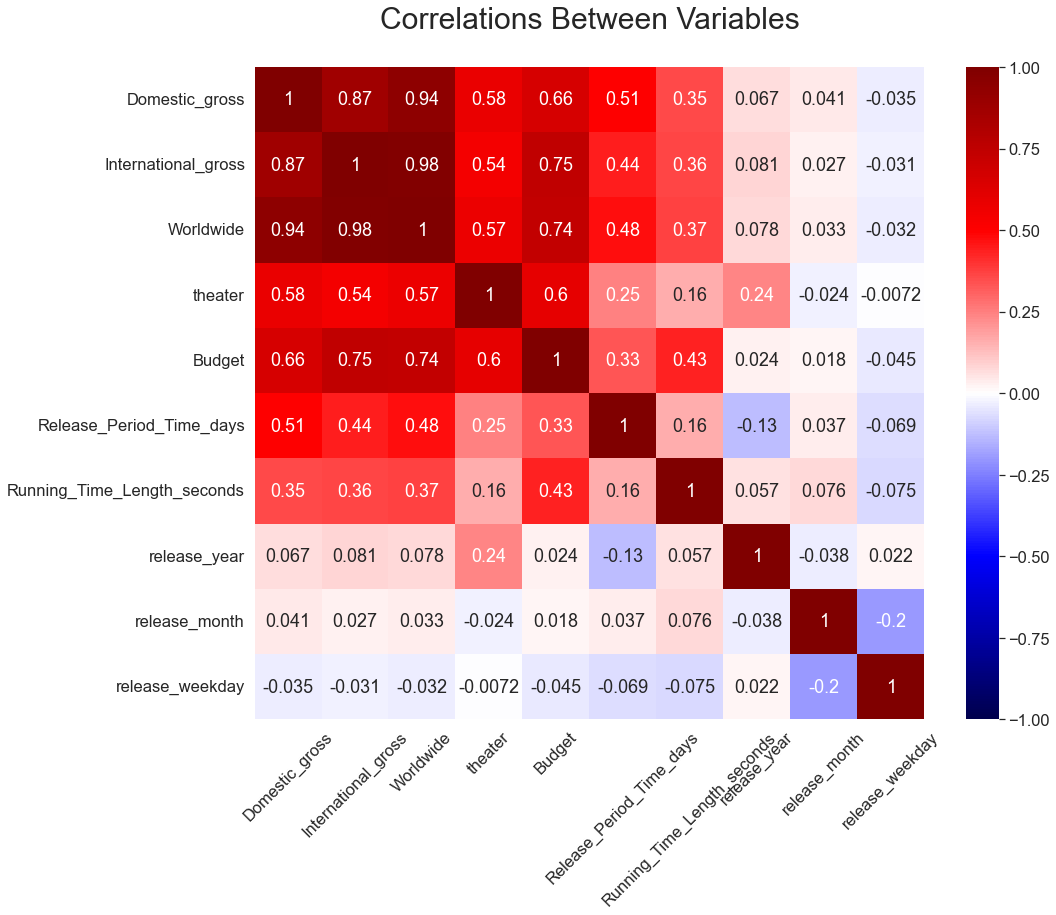

In [203]:
import matplotlib.pylab as plt
sns.set()
sns.set(rc = {'figure.figsize':(15,12)})
sns.set(font_scale = 1.5)
seaborn_plot = sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);
seaborn_plot.set_xticklabels(seaborn_plot.get_xticklabels(),rotation = 45)
plt.title("Correlations Between Variables",y=1.05, fontdict = {'fontsize' : 30})
#plt.xticks(rotation=15)
fig1 = seaborn_plot.get_figure()
fig1.savefig('/home/yingqing/Documents/Metis bootcamp/Regression/Regression_project/plots/plot1.png', bbox_inches='tight')

## Fit several individual relationship

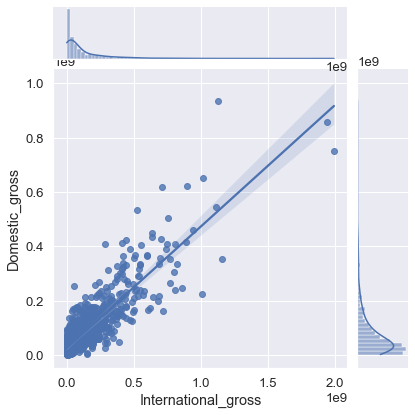

In [204]:
sns.set()
sns.set(rc = {'figure.figsize':(8,8)})
sns.set(font_scale = 1.2)
seaborn_plot2 =sns.jointplot(data=df, x = 'International_gross',y = 'Domestic_gross', kind="reg")
#fig2 = seaborn_plot2.get_figure()
seaborn_plot2.savefig('/home/yingqing/Documents/Metis bootcamp/Regression/Regression_project/plots/plot2.png', bbox_inches='tight')

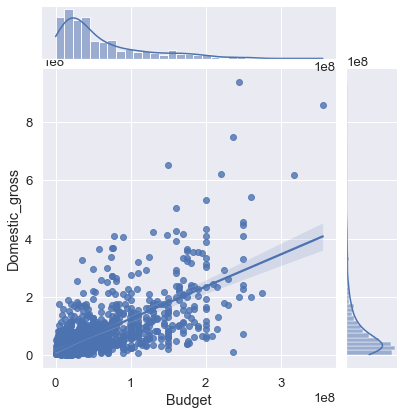

In [205]:
sns.set()
sns.set(rc = {'figure.figsize':(8,8)})
sns.set(font_scale = 1.2)
seaborn_plot3 =sns.jointplot(data=df, x = 'Budget',y = 'Domestic_gross', kind="reg")
#fig2 = seaborn_plot2.get_figure()
seaborn_plot3.savefig('/home/yingqing/Documents/Metis bootcamp/Regression/Regression_project/plots/plot3.png', bbox_inches='tight')

In [206]:
#df_1 = (df.groupby(['release_year'],as_index=False).Domestic_gross.mean())
#df_1.head()

In [207]:
#sns.set(rc = {'figure.figsize':(15,8)})
#sns.set(font_scale = 1.5)
#seaborn_plot = sns.barplot(x=df_1['release_year'], y=df_1['Domestic_gross'])
#seaborn_plot.set(xlabel = "Release Year")
#seaborn_plot.set(ylabel = "Domestic Gross $")

In [208]:
#df_2 = (df.groupby(['distributer'],as_index=False).Domestic_gross.mean())
#df_2 = df_2.sort_values("Domestic_gross", ascending=False).head(10)


In [52]:
#sns.set(rc = {'figure.figsize':(15,8)})
##sns.set(font_scale = 1.5)
#seaborn_plot = sns.barplot(x=df_2['distributer'], y=df_2['Domestic_gross'])
#seaborn_plot.set(xlabel = "distributer")
#seaborn_plot.set(ylabel = "Domestic Gross $")
#seaborn_plot.set_xticklabels(seaborn_plot.get_xticklabels(),rotation = 30)

## Feature Engineering

In [209]:
df_mid = df.drop(columns = ['Title','International_gross','Worldwide','Domestic_gross'])
df_mid.head()

,theater,distributer,Genres_thefirst,MPAA,Budget,Release_Period_Time_days,Running_Time_Length_seconds,release_year,release_month,release_weekday
0,3461,Twentieth Century Fox,Action,PG-13,237000000.0,237,162.0,2009,12,4
1,3739,Walt Disney Studios Motion Pictures,Adventure,PG,200000000.0,125,108.0,2010,3,4
2,4390,Paramount Pictures,Action,PG-13,200000000.0,104,124.0,2010,5,4
3,4468,Summit Entertainment,Action,PG-13,68000000.0,113,124.0,2010,6,2
4,3792,Warner Bros.,Action,PG-13,160000000.0,174,148.0,2010,7,4


In [210]:
X = pd.get_dummies(df_mid,drop_first=True)
y = df['Domestic_gross']

In [211]:
#X['theater^2'] = X['theater']*X['theater']
#X['Budget^2'] = X['Budget']*X['Budget']
#X['Release_Period_Time_days^2'] = X['Release_Period_Time_days']*X['Release_Period_Time_days']

In [212]:
#X.drop(columns = ['release_weekday'],inplace=True)

In [213]:
X.head()

,theater,Budget,Release_Period_Time_days,Running_Time_Length_seconds,release_year,release_month,release_weekday,distributer_A24,distributer_Affirm Films,distributer_Anchor Bay Films,...,Genres_thefirst_Fantasy,Genres_thefirst_Horror,Genres_thefirst_Music,Genres_thefirst_Mystery,Genres_thefirst_Romance,Genres_thefirst_Sci-Fi,Genres_thefirst_Thriller,MPAA_PG,MPAA_PG-13,MPAA_R
0,3461,237000000.0,237,162.0,2009,12,4,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3739,200000000.0,125,108.0,2010,3,4,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4390,200000000.0,104,124.0,2010,5,4,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4468,68000000.0,113,124.0,2010,6,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,3792,160000000.0,174,148.0,2010,7,4,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Regression

### Simple Linear Regression

In [214]:
y = np.log(y)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
# fit linear regression to training data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# score fit model on validation data
train_score = lr_model.score(X_train, y_train)
val_score = lr_model.score(X_val, y_val)

# report results
print('\nTrain R^2 score was:', train_score)
print('\nValidation R^2 score was:', val_score)
print('Feature coefficient results: \n')
for feature, coef in zip(X.columns, lr_model.coef_):
    print(feature, ':', f'{coef:.2f}') 


Train R^2 score was: 0.8652789276151107

Validation R^2 score was: 0.8476464059175501
Feature coefficient results: 

theater : 0.00
Budget : 0.00
Release_Period_Time_days : 0.01
Running_Time_Length_seconds : 0.01
release_year : -0.02
release_month : 0.00
release_weekday : -0.03
distributer_A24 : 0.06
distributer_Affirm Films : 0.96
distributer_Anchor Bay Films : -0.19
distributer_Apparition : 0.43
distributer_Aviron Pictures : 0.46
distributer_BH Tilt : 0.47
distributer_Bleecker Street Media : 0.02
distributer_Broad Green Pictures : 0.09
distributer_CBS Films : 0.57
distributer_Cinelou Films : -0.53
distributer_Clarius Entertainment : -0.00
distributer_DreamWorks : 0.61
distributer_Entertainment Studios Motion Pictures : -0.43
distributer_EuropaCorp : 0.58
distributer_FUNimation Entertainment : 2.48
distributer_FilmDistrict : 0.16
distributer_Focus Features : 0.45
distributer_Fox Searchlight Pictures : 0.35
distributer_Freestyle Releasing : 0.27
distributer_Lionsgate : 0.58
distribute

In [215]:
#X1 = X.copy()
#X1['res'] = lr_model.predict(X)-y
#X1.sort_values(['res']).head()
residuals = lr_model.predict(X) - y
rmse = np.sqrt(sum(residuals**2)/len(residuals))
print(rmse)

mae = sum(abs(lr_model.predict(X) - y))/len(y)
print(mae)

0.4159409614940722
0.3169652880693281


### Simple Linear Regression - Cross Validation

In [216]:
from sklearn.model_selection import KFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state = 42)
#collect the validation results for both models
cv_lm_r2s, cv_lm_scale_r2s = [], [] 
for train_ind, val_ind in kf.split(X,y):
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind] 
    #simple linear regression
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')

lm = LinearRegression()
lm.fit(X_train, y_train)
train_score = lm.score(X_train, y_train)
test_score = lm.score(X_test, y_test)
print('Train Score: ', lm.score(X_train, y_train))
print('Test Score: ', lm.score(X_test, y_test))
### END SOLUTION

Simple regression scores:  [0.8476464059175499, 0.8451465134811249, 0.835630095143068, 0.8211297172662462, 0.8065593023215105]
Simple mean cv r^2: 0.831 +- 0.015
Train Score:  0.8750004659249696
Test Score:  0.8818734930772094


In [217]:
residuals = lm.predict(X) - y
rmse = np.sqrt(sum(residuals**2)/len(residuals))
print(rmse)

mae = sum(abs(lm.predict(X) - y))/len(y)
print(mae)

0.41636769567226045
0.31792677814078363


## PLOT

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


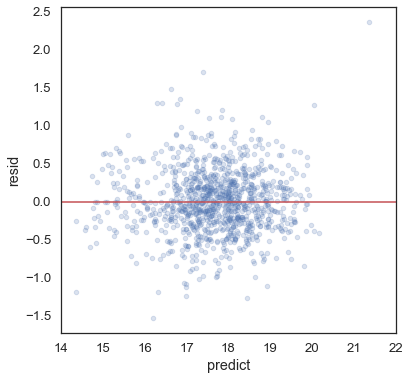

In [248]:
import matplotlib.lines as mlines
X2 = X.copy()
X2['resid'] = lm.predict(X)-y
X2['predict']=lm.predict(X)
X2['y']=y

with sns.axes_style('white'):
    plot4=X2.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.2,figsize=(6,6))
ax = plt.gca()
line = plt.plot([0, 22], [0, 0],color = 'r')
plt.xlim([14, 22])
#plt.ylim([-0.1, 0.15])
plt.savefig('/home/yingqing/Documents/Metis bootcamp/Regression/Regression_project/plots/plot4.png', bbox_inches='tight')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


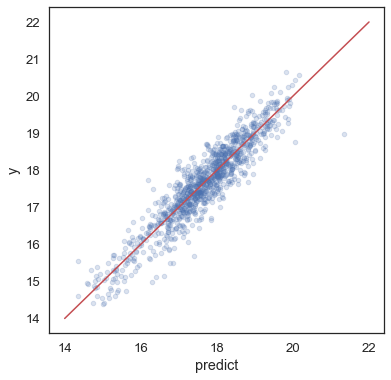

In [249]:
with sns.axes_style('white'):
    plot=X2.plot(kind='scatter',
                  x='predict',y='y',alpha=0.2,figsize=(6,6))
    
ax = plt.gca()
line = plt.plot([14, 22], [14, 22],color = 'r')
#plt.xlim([2.5, 3.1])
#plt.ylim([-0.1, 0.15])
#plt.ylabel('fit')
plt.savefig('/home/yingqing/Documents/Metis bootcamp/Regression/Regression_project/plots/plot5.png', bbox_inches='tight')

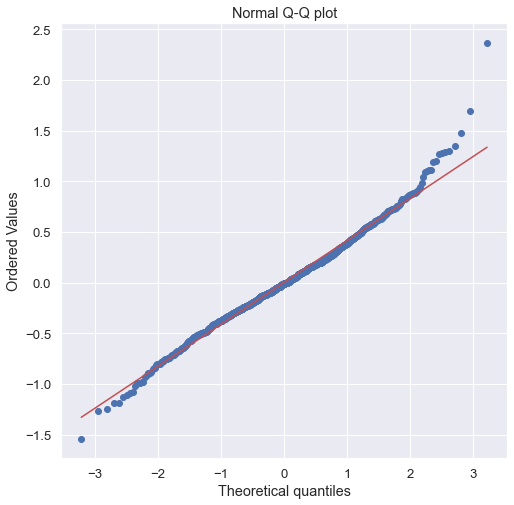

In [250]:
from scipy import stats
# diagnose/inspect residual normality using qqplot:
stats.probplot(X2['resid'], dist="norm", plot=plt.gca())
plt.title("Normal Q-Q plot")
#plt.xlabel('dd')
#plt.show()
plt.savefig('/home/yingqing/Documents/Metis bootcamp/Regression/Regression_project/plots/plot6.png', bbox_inches='tight')

### Polynomial Regression

In [221]:
from sklearn.preprocessing import PolynomialFeatures

In [222]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_poly = poly.fit_transform(X)
# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
train_score = lr_poly.score(X_train_poly,y_train)
# Score on validation set
val_score = lr_poly.score(X_val_poly, y_val)
print('\nTrain R^2 score was:', train_score)
print('\nValidation R^2 score was:', val_score)


Train R^2 score was: 0.9120525177392607

Validation R^2 score was: 0.35621843766620864


In [223]:
residuals = lr_poly.predict(X_poly) - y
rmse = np.sqrt(sum(residuals**2)/len(residuals))
print(rmse)

mae = sum(abs(lr_poly.predict(X_poly) - y))/len(y)
print(mae)

0.4970306164961206
0.2808237123220995


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


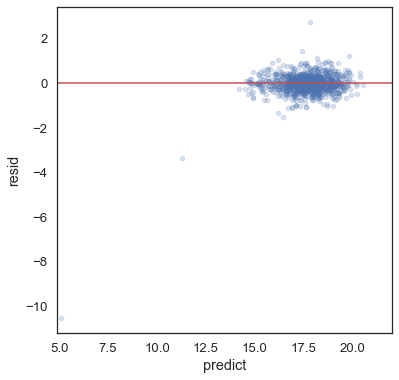

In [253]:
X3 = X.copy()
X3['resid'] = lr_poly.predict(X_poly)-y
X3['predict']=lr_poly.predict(X_poly)
X3['y']=y

with sns.axes_style('white'):
    plot4=X3.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.2,figsize=(6,6))
ax = plt.gca()
line = plt.plot([0, 22], [0, 0],color = 'r')
plt.xlim([4.9, 22])
#plt.ylim([-0.1, 0.15])
plt.savefig('/home/yingqing/Documents/Metis bootcamp/Regression/Regression_project/plots/plot7.png', bbox_inches='tight')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


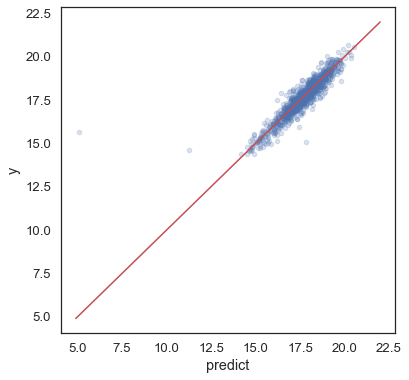

In [254]:
with sns.axes_style('white'):
    plot=X3.plot(kind='scatter',
                  x='predict',y='y',alpha=0.2,figsize=(6,6))
    
ax = plt.gca()
line = plt.plot([4.9, 22], [4.9, 22],color = 'r')
#plt.xlim([2.5, 3.2])
#plt.ylim([2.5, 3.2])
#plt.ylabel('fit')
plt.savefig('/home/yingqing/Documents/Metis bootcamp/Regression/Regression_project/plots/plot8.png', bbox_inches='tight')

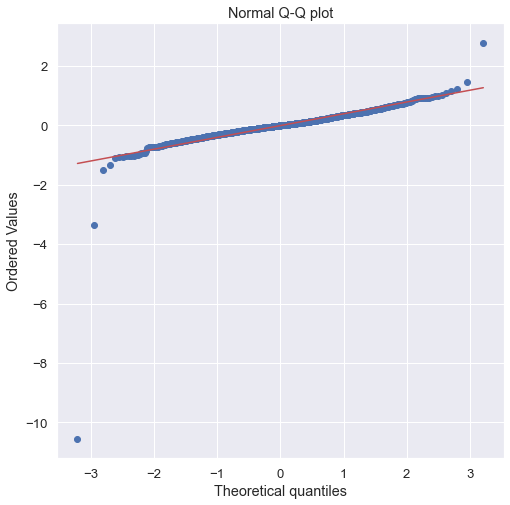

In [255]:
from scipy import stats
# diagnose/inspect residual normality using qqplot:
stats.probplot(X3['resid'], dist="norm", plot=plt.gca())
plt.title("Normal Q-Q plot")
#plt.xlabel('dd')
#plt.show()
plt.savefig('/home/yingqing/Documents/Metis bootcamp/Regression/Regression_project/plots/plot9.png', bbox_inches='tight')

### Lasso Regression

In [227]:
from sklearn.linear_model import LassoCV, RidgeCV

In [228]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
alphas = 10**np.linspace(-2,2,200)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_scaled = scaler.fit_transform(X)
# Apply the same scaler to val set
X_val_scaled = scaler.transform(X_val)

# Fit a LASSO model using polynomial features
lasso = LassoCV()
lasso.fit(X_train_scaled,y_train)
train_score = lasso.score(X_train_scaled,y_train)
# Score on validation set
val_score = lasso.score(X_val_scaled, y_val)
print('\nTrain R^2 score was:', train_score)
print('\nValidation R^2 score was:', val_score)


Train R^2 score was: 0.8578217465403131

Validation R^2 score was: 0.8371271059581402


In [229]:
residuals = lasso.predict(X_scaled) - y
rmse = np.sqrt(sum(residuals**2)/len(residuals))
print(rmse)

mae = sum(abs(lasso.predict(X_scaled) - y))/len(y)
print(mae)

0.4275239994625934
0.3306961643746122


### Plot LARS path

In [230]:
from sklearn.linear_model import lars_path

Computing regularization path using the LARS ...


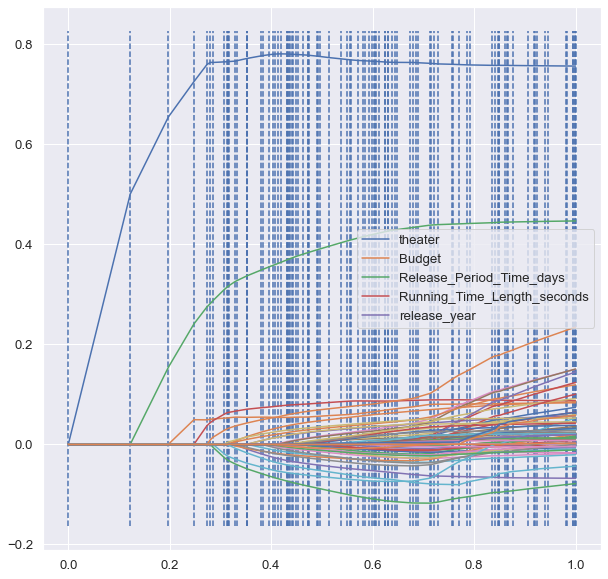

In [232]:
alphas = 10**np.linspace(-2,2,200)

print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_train_scaled, y_train.values, method='lasso')

# plotting the LARS path

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
#plt.xlabel('|coef| / max|coef|')
#plt.ylabel('Coefficients')
#plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns[0:5])
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


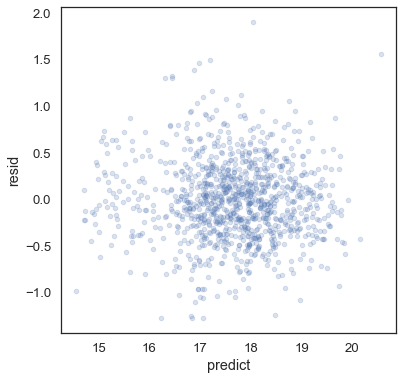

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


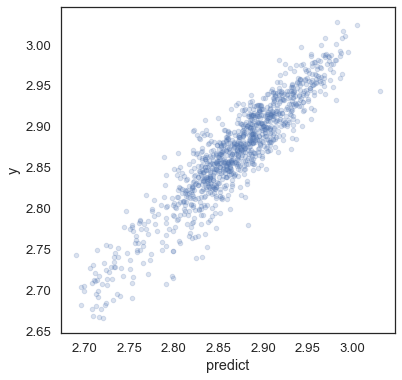

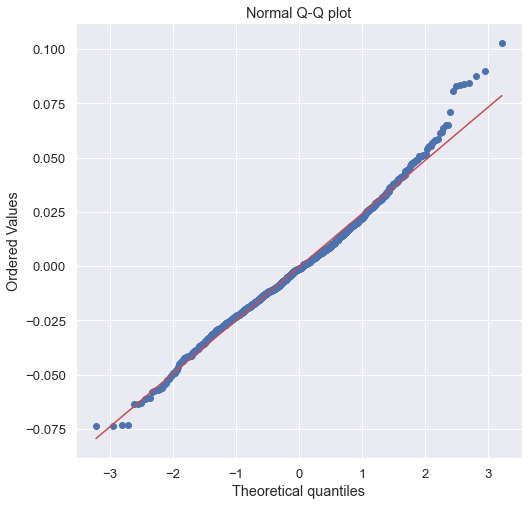

### Ridge Regression

In [234]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
alphas = 10**np.linspace(-2,2,200)
# Don't forget to standard scale your data for regularized regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaler to val set
X_val_scaled = scaler.transform(X_val)
X_scaled = scaler.fit_transform(X)
# Fit a LASSO model using polynomial features
ridge = RidgeCV(alphas = alphas, cv=5)
ridge.fit(X_train_scaled,y_train)
train_score = ridge.score(X_train_scaled,y_train)
# Score on validation set
val_score = ridge.score(X_val_scaled, y_val)
print('\nTrain R^2 score was:', train_score)
print('\nValidation R^2 score was:', val_score)


Train R^2 score was: 0.863542853830337

Validation R^2 score was: 0.8362882208736568


In [235]:
residuals = ridge.predict(X_scaled) - y
rmse = np.sqrt(sum(residuals**2)/len(residuals))
print(rmse)

mae = sum(abs(ridge.predict(X_scaled) - y))/len(y)
print(mae)

0.4215611828820765
0.3214357203671678


### Elastic Net

In [236]:
from sklearn.linear_model import ElasticNetCV

In [237]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
alphas = 10 ** np.linspace(-2,2, 200)

std = StandardScaler()
std.fit(X_train.values)

## apply the scaler to the train set
X_tr = std.transform(X_train.values)

## Apply the scaler to the test set
X_te = std.transform(X_test.values)

X_ss = std.transform(X.values)
enet_model = ElasticNetCV(l1_ratio = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], 
                          alphas = alphas, 
                          cv=5,
                          random_state=42)

enet_model.fit(X_tr, y_train)

r_squared_train = enet_model.score(X_tr, y_train)
r_squared_test = enet_model.score(X_te, y_test)
alpha = enet_model.alpha_
l1_ratio = enet_model.l1_ratio_

print("r_squared_train: ", round(r_squared_train, 3))
print("r_squared_test: ", round(r_squared_test, 3))

r_squared_train:  0.858
r_squared_test:  0.837


In [238]:
residuals = enet_model.predict(X_ss) - y
rmse = np.sqrt(sum(residuals**2)/len(residuals))
print(rmse)

mae = sum(abs(enet_model.predict(X_ss) - y))/len(y)
print(mae)

0.42812112088652743
0.33127530796672205


## Predict 3 Movies

In [239]:
the_dataset = pd.concat([X[121:122], X[5:6]])
the_dataset2 = pd.concat([the_dataset, X[1000:1001]])
the_dataset2

,theater,Budget,Release_Period_Time_days,Running_Time_Length_seconds,release_year,release_month,release_weekday,distributer_A24,distributer_Affirm Films,distributer_Anchor Bay Films,...,Genres_thefirst_Fantasy,Genres_thefirst_Horror,Genres_thefirst_Music,Genres_thefirst_Mystery,Genres_thefirst_Romance,Genres_thefirst_Sci-Fi,Genres_thefirst_Thriller,MPAA_PG,MPAA_PG-13,MPAA_R
121,2718,58000000.0,37,103.0,2009,12,4,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,3602,69000000.0,195,95.0,2010,7,4,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1087,3802,170000000.0,84,122.0,2019,2,3,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [240]:
cc = pd.concat([df[121:122], df[5:6]])
cc2 = pd.concat([cc, df[1000:1001]])
cc2

,Title,Domestic_gross,International_gross,Worldwide,theater,distributer,Genres_thefirst,MPAA,Budget,Release_Period_Time_days,Running_Time_Length_seconds,release_year,release_month,release_weekday
121,Did You Hear About the Morgans?,29580087,55700163,85280250.0,2718,Sony Pictures Entertainment (SPE),Comedy,PG-13,58000000.0,37,103.0,2009,12,4
5,Despicable Me,251513985,291600000,543113985.0,3602,Universal Pictures,Adventure,PG,69000000.0,195,95.0,2010,7,4
1087,Alita: Battle Angel,85838210,319142333,404980543.0,3802,Twentieth Century Fox,Action,PG-13,170000000.0,84,122.0,2019,2,3


In [244]:
yy1 = (cc2['Domestic_gross'])

In [245]:
predict1 = lm.predict(the_dataset2)
np.exp(predict1)

array([2.45174528e+07, 2.95286450e+08, 6.87281248e+07])

In [246]:
yy1

121      29580087
5       251513985
1087     85838210
Name: Domestic_gross, dtype: int64

## Consider COVID impact

In [198]:
y.max()

3.0280945835363804

### Time series?

In [226]:
pd.unique(df['release_year'])

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020])